# Homework 
The JFK international airport is located within longitude -73.82 to -73.78 and latitude 40.63 to 40.67. Extract all taxi trips who picked up passengers from this area.
1. For this sub-dataset only, visualize the correlation between the aerial distance and the trip duration.
2. For this sub-dataset only, visualize the drop-off location using dropoff_longitude and dropoff_latitude.
3. There was a snow storm on Jan 23, 2016. Is the distribution of trip_duration on that day different from the rest of the year?

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
taxidata = pd.read_csv("Data/nyctaxi/train.csv", delimiter=",")

In [4]:
taxidata.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
taxidata.shape

(1458644, 11)

In [32]:
jfk_long_filter = (taxidata["pickup_longitude"] >= -73.82) & (taxidata["pickup_longitude"] <= -73.78) 

jfk_taxidata = taxidata[jfk_long_filter]

jfk_lat_filter = (jfk_taxidata["pickup_latitude"] >= 40.63) & (jfk_taxidata["pickup_latitude"] <= 40.67)
jfk_taxidata = jfk_taxidata[jfk_lat_filter]

jfk_taxidata.shape

(25736, 11)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Aerial Distance vs. Trip Duration')

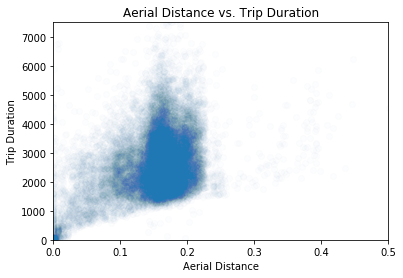

In [65]:
jfk_taxidata["aerial_distance"] = np.sqrt( ((jfk_taxidata["pickup_longitude"] - jfk_taxidata["dropoff_longitude"])**2) - ((jfk_taxidata["pickup_latitude"] - jfk_taxidata["dropoff_latitude"])**2))

plt.scatter(jfk_taxidata["aerial_distance"], jfk_taxidata["trip_duration"], alpha = 0.01)
plt.ylim(0,7500)
plt.xlim(0,0.5)
plt.xlabel("Aerial Distance")
plt.ylabel("Trip Duration")
plt.title("Aerial Distance vs. Trip Duration")

__Conclusion:__ There seems to be some positive correlation between aerial distance and trip_duration...

Text(0, 0.5, 'Longitude')

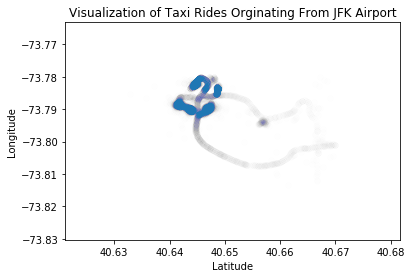

In [37]:
plt.scatter(jfk_taxidata["pickup_latitude"], jfk_taxidata["pickup_longitude"], alpha = 0.005)
plt.title("Visualization of Taxi Rides Orginating From JFK Airport")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

__Conclusion:__ It resembles the highway leading to and from JFK. 

In [30]:
taxidata.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [31]:
taxidata["pickup_datetime"] = taxidata["pickup_datetime"].astype(np.datetime64)

In [57]:
snowstorm_filter = (taxidata["pickup_datetime"].dt.year == 2016) & (taxidata["pickup_datetime"].dt.month == 1) & (taxidata["pickup_datetime"].dt.day == 23)
snowstorm_taxidata = taxidata[snowstorm_filter]
snowstorm_taxidata.shape

(1648, 11)

Text(0, 0.5, 'Frequency')

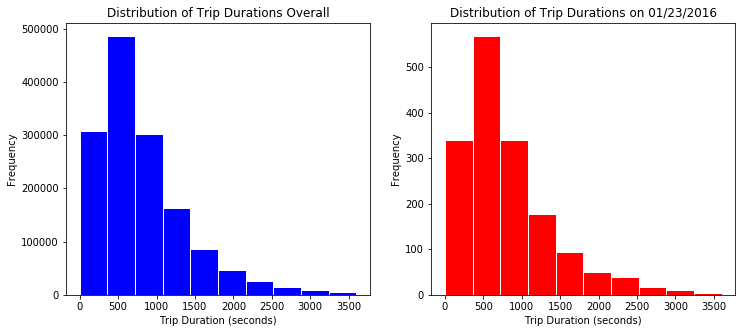

In [60]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(taxidata["trip_duration"], range = (0,3600), edgecolor = "white", color = "blue")
ax1.set_title("Distribution of Trip Durations Overall")
ax1.set_xlabel("Trip Duration (seconds)")
ax1.set_ylabel("Frequency")
ax2.hist(snowstorm_taxidata["trip_duration"], range = (0,3600), edgecolor = "white", color = "red")
ax2.set_title("Distribution of Trip Durations on 01/23/2016")
ax2.set_xlabel("Trip Duration (seconds)")
ax2.set_ylabel("Frequency")

__Conclusion:__ The distribution of the trip durations does not differ on January 23rd, 2016.